In [23]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
from dotenv import load_dotenv

load_dotenv("./.env")

client_id = os.environ.get("SPOTIFY_CLIENT_ID")
client_secret = os.environ.get("SPOTIFY_CLIENT_SECRET")

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id, client_secret), requests_timeout=45)

In [24]:
import pandas as pd
from joblib import Parallel, delayed

df = pd.read_csv('tracks5.csv')
list_songs = df['0'].dropna().values.tolist()


In [25]:
def getFeatures(id):
    try:
        return sp.audio_features(id)
    except:
        return None

features = Parallel(
    n_jobs=50
)(
    delayed(getFeatures)(i) for i in list_songs
)

# features = pd.read_csv('features.csv')


Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached
Max Retries reached


In [38]:
features2 = [i for i in features if i != None]
flattened = [b for b in features2 for b in b if b]


In [39]:
df2 = pd.DataFrame(flattened)

# df2.to_csv('features.csv', index=False)

In [40]:
df2.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.683,0.8460,7,-3.551,1,0.0422,0.06340,0.000000,0.3460,0.7060,131.884,audio_features,3hlWUNjAlbZ6nOjAbrivBv,spotify:track:3hlWUNjAlbZ6nOjAbrivBv,https://api.spotify.com/v1/tracks/3hlWUNjAlbZ6...,https://api.spotify.com/v1/audio-analysis/3hlW...,217000,4
1,0.122,0.0261,4,-32.465,0,0.0339,0.82500,0.903000,0.1090,0.0323,95.484,audio_features,464ZqN4UqyJTbibnQfsBeG,spotify:track:464ZqN4UqyJTbibnQfsBeG,https://api.spotify.com/v1/tracks/464ZqN4UqyJT...,https://api.spotify.com/v1/audio-analysis/464Z...,424089,4
2,0.432,0.5550,2,-7.336,1,0.0330,0.62500,0.000038,0.1280,0.5270,79.369,audio_features,7FhBSLKkjTFTcqsnDFye9d,spotify:track:7FhBSLKkjTFTcqsnDFye9d,https://api.spotify.com/v1/tracks/7FhBSLKkjTFT...,https://api.spotify.com/v1/audio-analysis/7FhB...,222307,4
3,0.621,0.8260,2,-5.786,1,0.0334,0.00275,0.058300,0.2280,0.7170,119.989,audio_features,5HvN5wQFNTNxlNBgeaPGbf,spotify:track:5HvN5wQFNTNxlNBgeaPGbf,https://api.spotify.com/v1/tracks/5HvN5wQFNTNx...,https://api.spotify.com/v1/audio-analysis/5HvN...,204693,4
4,0.569,0.4450,0,-5.159,1,0.0283,0.30700,0.000003,0.0957,0.4780,78.993,audio_features,4w9jtaewB2iRNCeEKnaAP5,spotify:track:4w9jtaewB2iRNCeEKnaAP5,https://api.spotify.com/v1/tracks/4w9jtaewB2iR...,https://api.spotify.com/v1/audio-analysis/4w9j...,311771,4


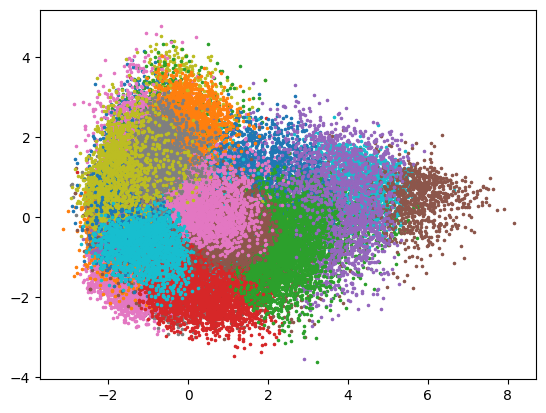

In [74]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np

def getClusterIds(df):
    # Normalize the data
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(df[["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]])
    # df_normalized = pd.DataFrame(X_normalized, columns=["danceability", "energy",  "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"])

    # Perform PCA
    pca = PCA(n_components=9)
    pca.fit(X_normalized)
    X_pca = pca.transform(X_normalized)

    # Predict clusters using KMeans
    kmeans = KMeans(n_clusters=50, n_init=10) # TODO: Find optimal number of clusters using an elbow graph
    kmeans.fit(X_pca)
    cluster_ids = kmeans.predict(X_pca)
    return cluster_ids, X_pca

cluster_ids, X_pca = getClusterIds(df2)

# Plot clusters
for c in np.unique(cluster_ids):
    plt.scatter(X_pca[cluster_ids == c, 0], X_pca[cluster_ids == c, 1], marker='.', s=10)

In [75]:
# Add cluster ids to dataframe
df2['cluster'] = cluster_ids


In [76]:
df2.to_csv('features_clustered.csv', index=False)